<a href="https://colab.research.google.com/github/habilmaulana/Mini-Project/blob/main/Habil_Maulana_Yusuf_Conqueror_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
tf.__version__

'2.18.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

### EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

#### Age Demography

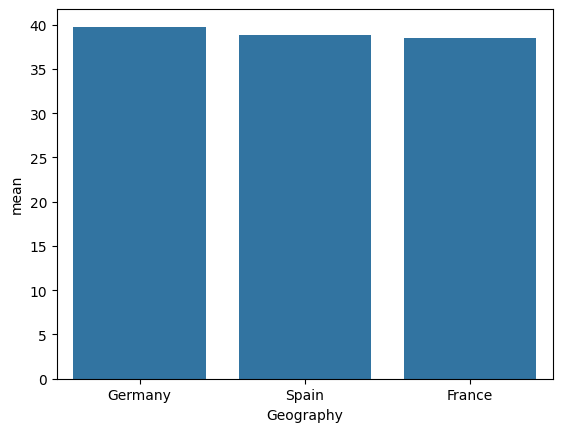

In [ ]:
import seaborn as sns

visual = df.groupby(['Geography'])['Age'].agg(['mean', 'std']).reset_index().sort_values(by='mean', ascending=False)
ax = sns.barplot(x="Geography", y="mean", data=visual)

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

#### Credit Score Demography

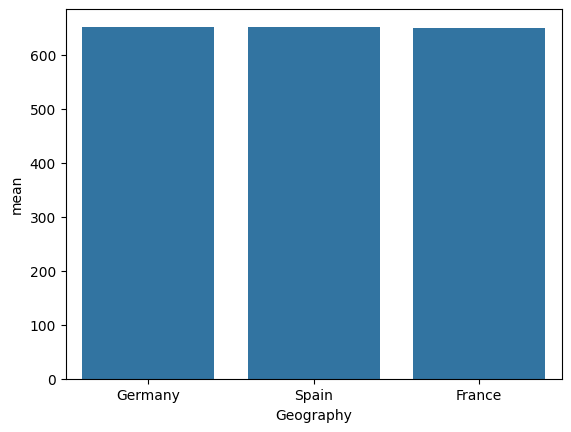

In [ ]:
visual = df.groupby(['Geography'])['CreditScore'].agg(['mean', 'std']).reset_index().sort_values(by='mean', ascending=False)
ax = sns.barplot(x="Geography", y="mean", data=visual)

#### Estimated Salary Demography

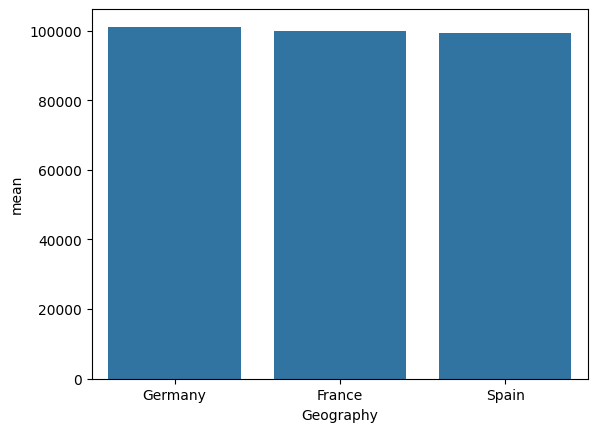

In [ ]:
visual = df.groupby(['Geography'])['EstimatedSalary'].agg(['mean', 'std']).reset_index().sort_values(by='mean', ascending=False)
ax = sns.barplot(x="Geography", y="mean", data=visual)

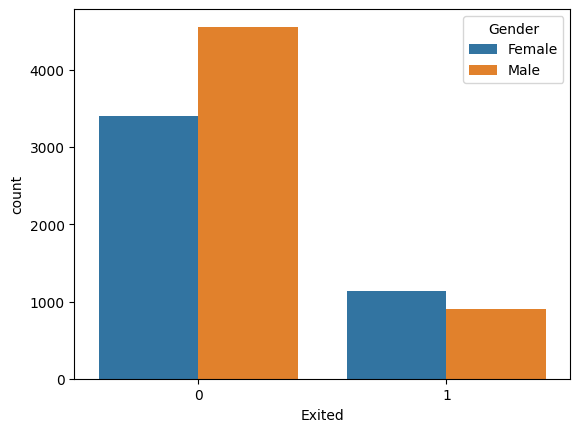

In [ ]:
ax = sns.countplot(x="Exited", hue="Gender", data=df)

In [ ]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

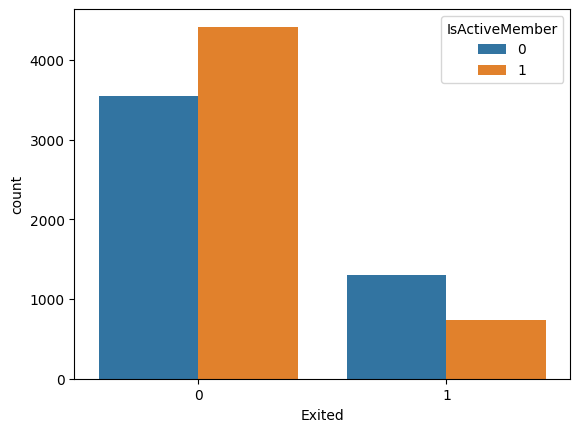

In [ ]:
ax = sns.countplot(x="Exited", hue="IsActiveMember", data=df)

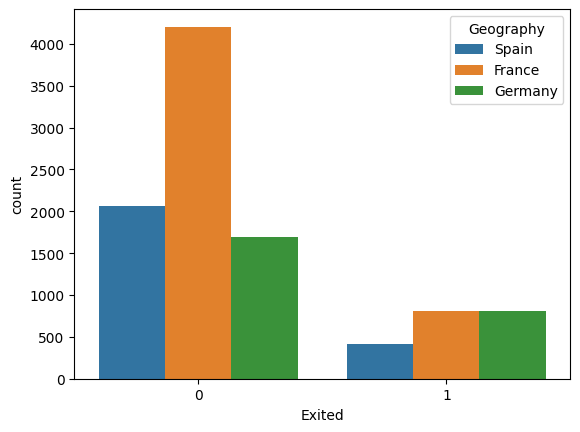

In [ ]:
ax = sns.countplot(x="Exited", hue="Geography", data=df)

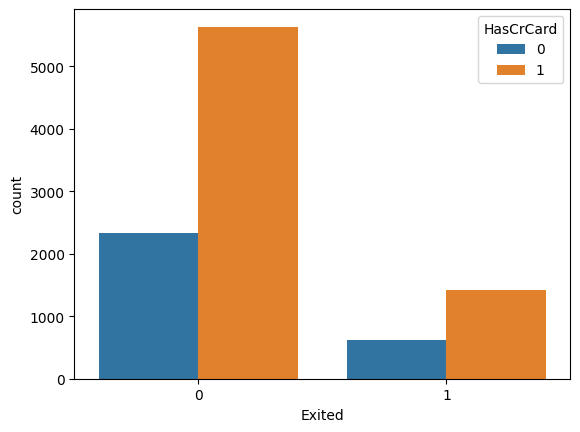

In [ ]:
ax = sns.countplot(x="Exited", hue="HasCrCard", data=df)

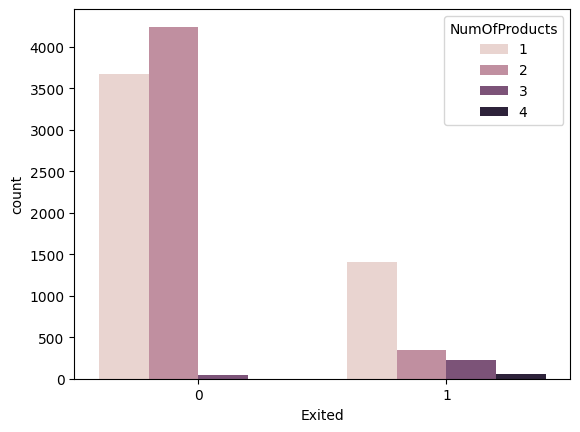

In [ ]:
ax = sns.countplot(x="Exited", hue="NumOfProducts", data=df)

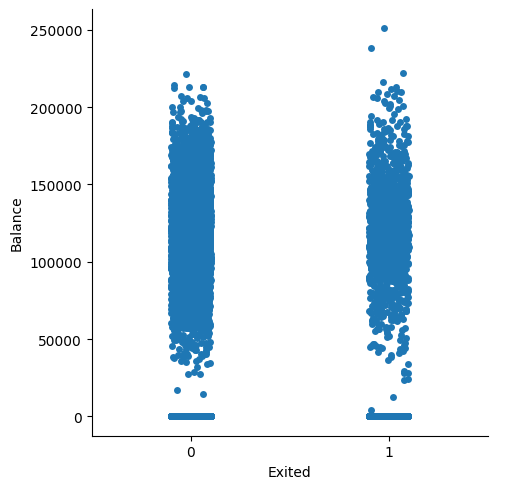

In [ ]:
g = sns.catplot(x="Exited", y="Balance", data=df)

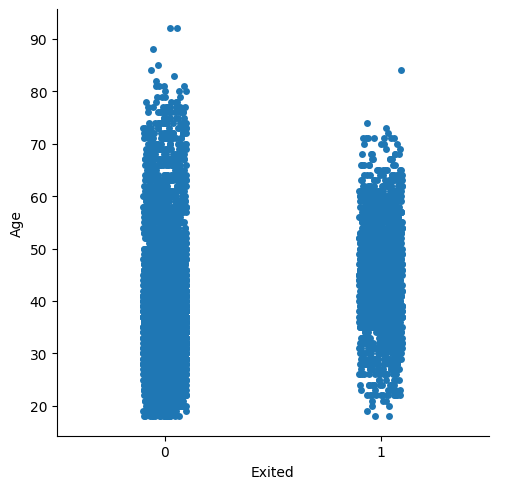

In [ ]:
 g = sns.catplot(x="Exited", y="Age", data=df)

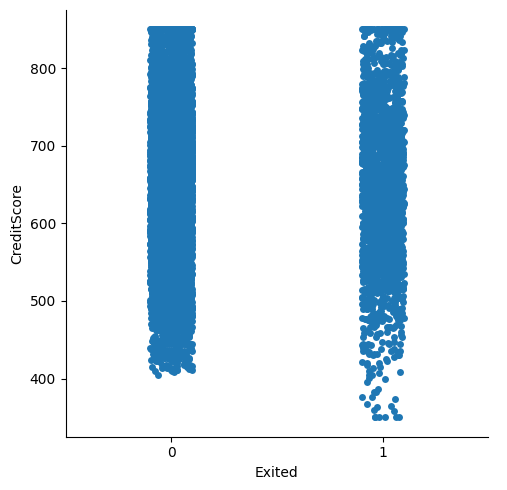

In [ ]:
g = sns.catplot(x="Exited", y="CreditScore", data=df)

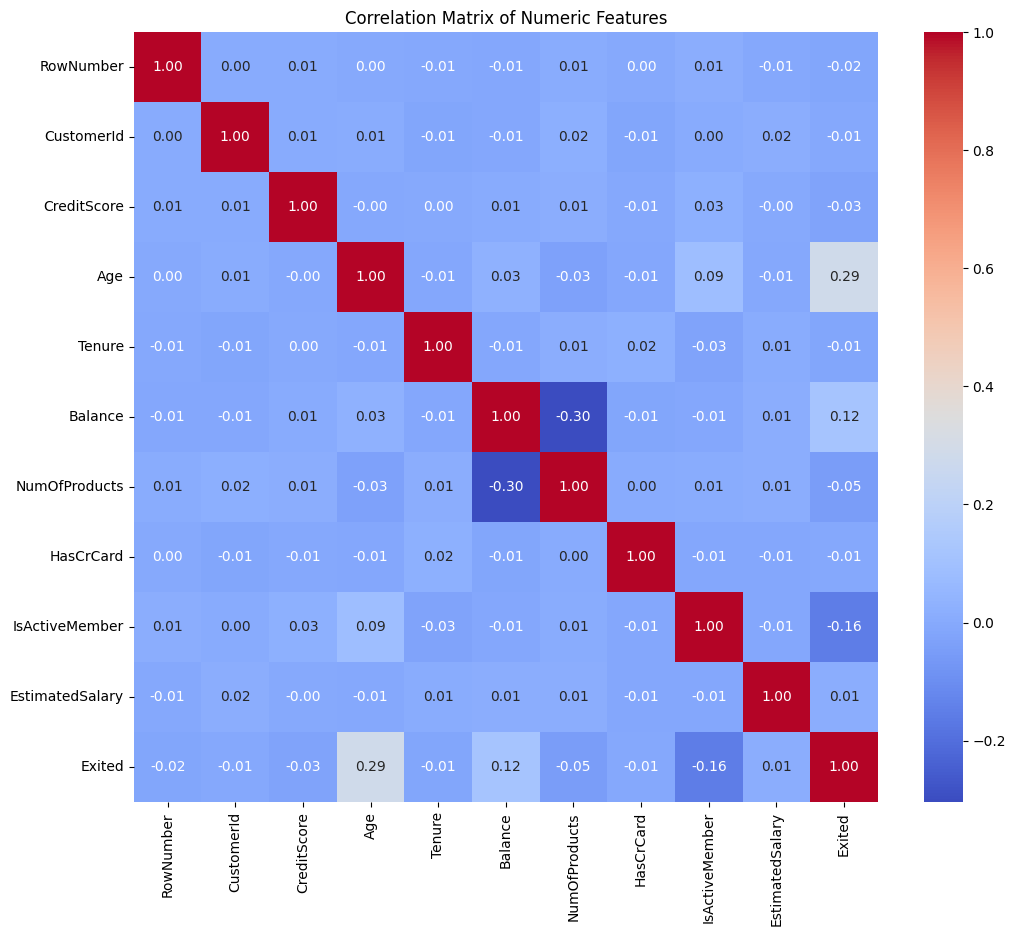

In [ ]:
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

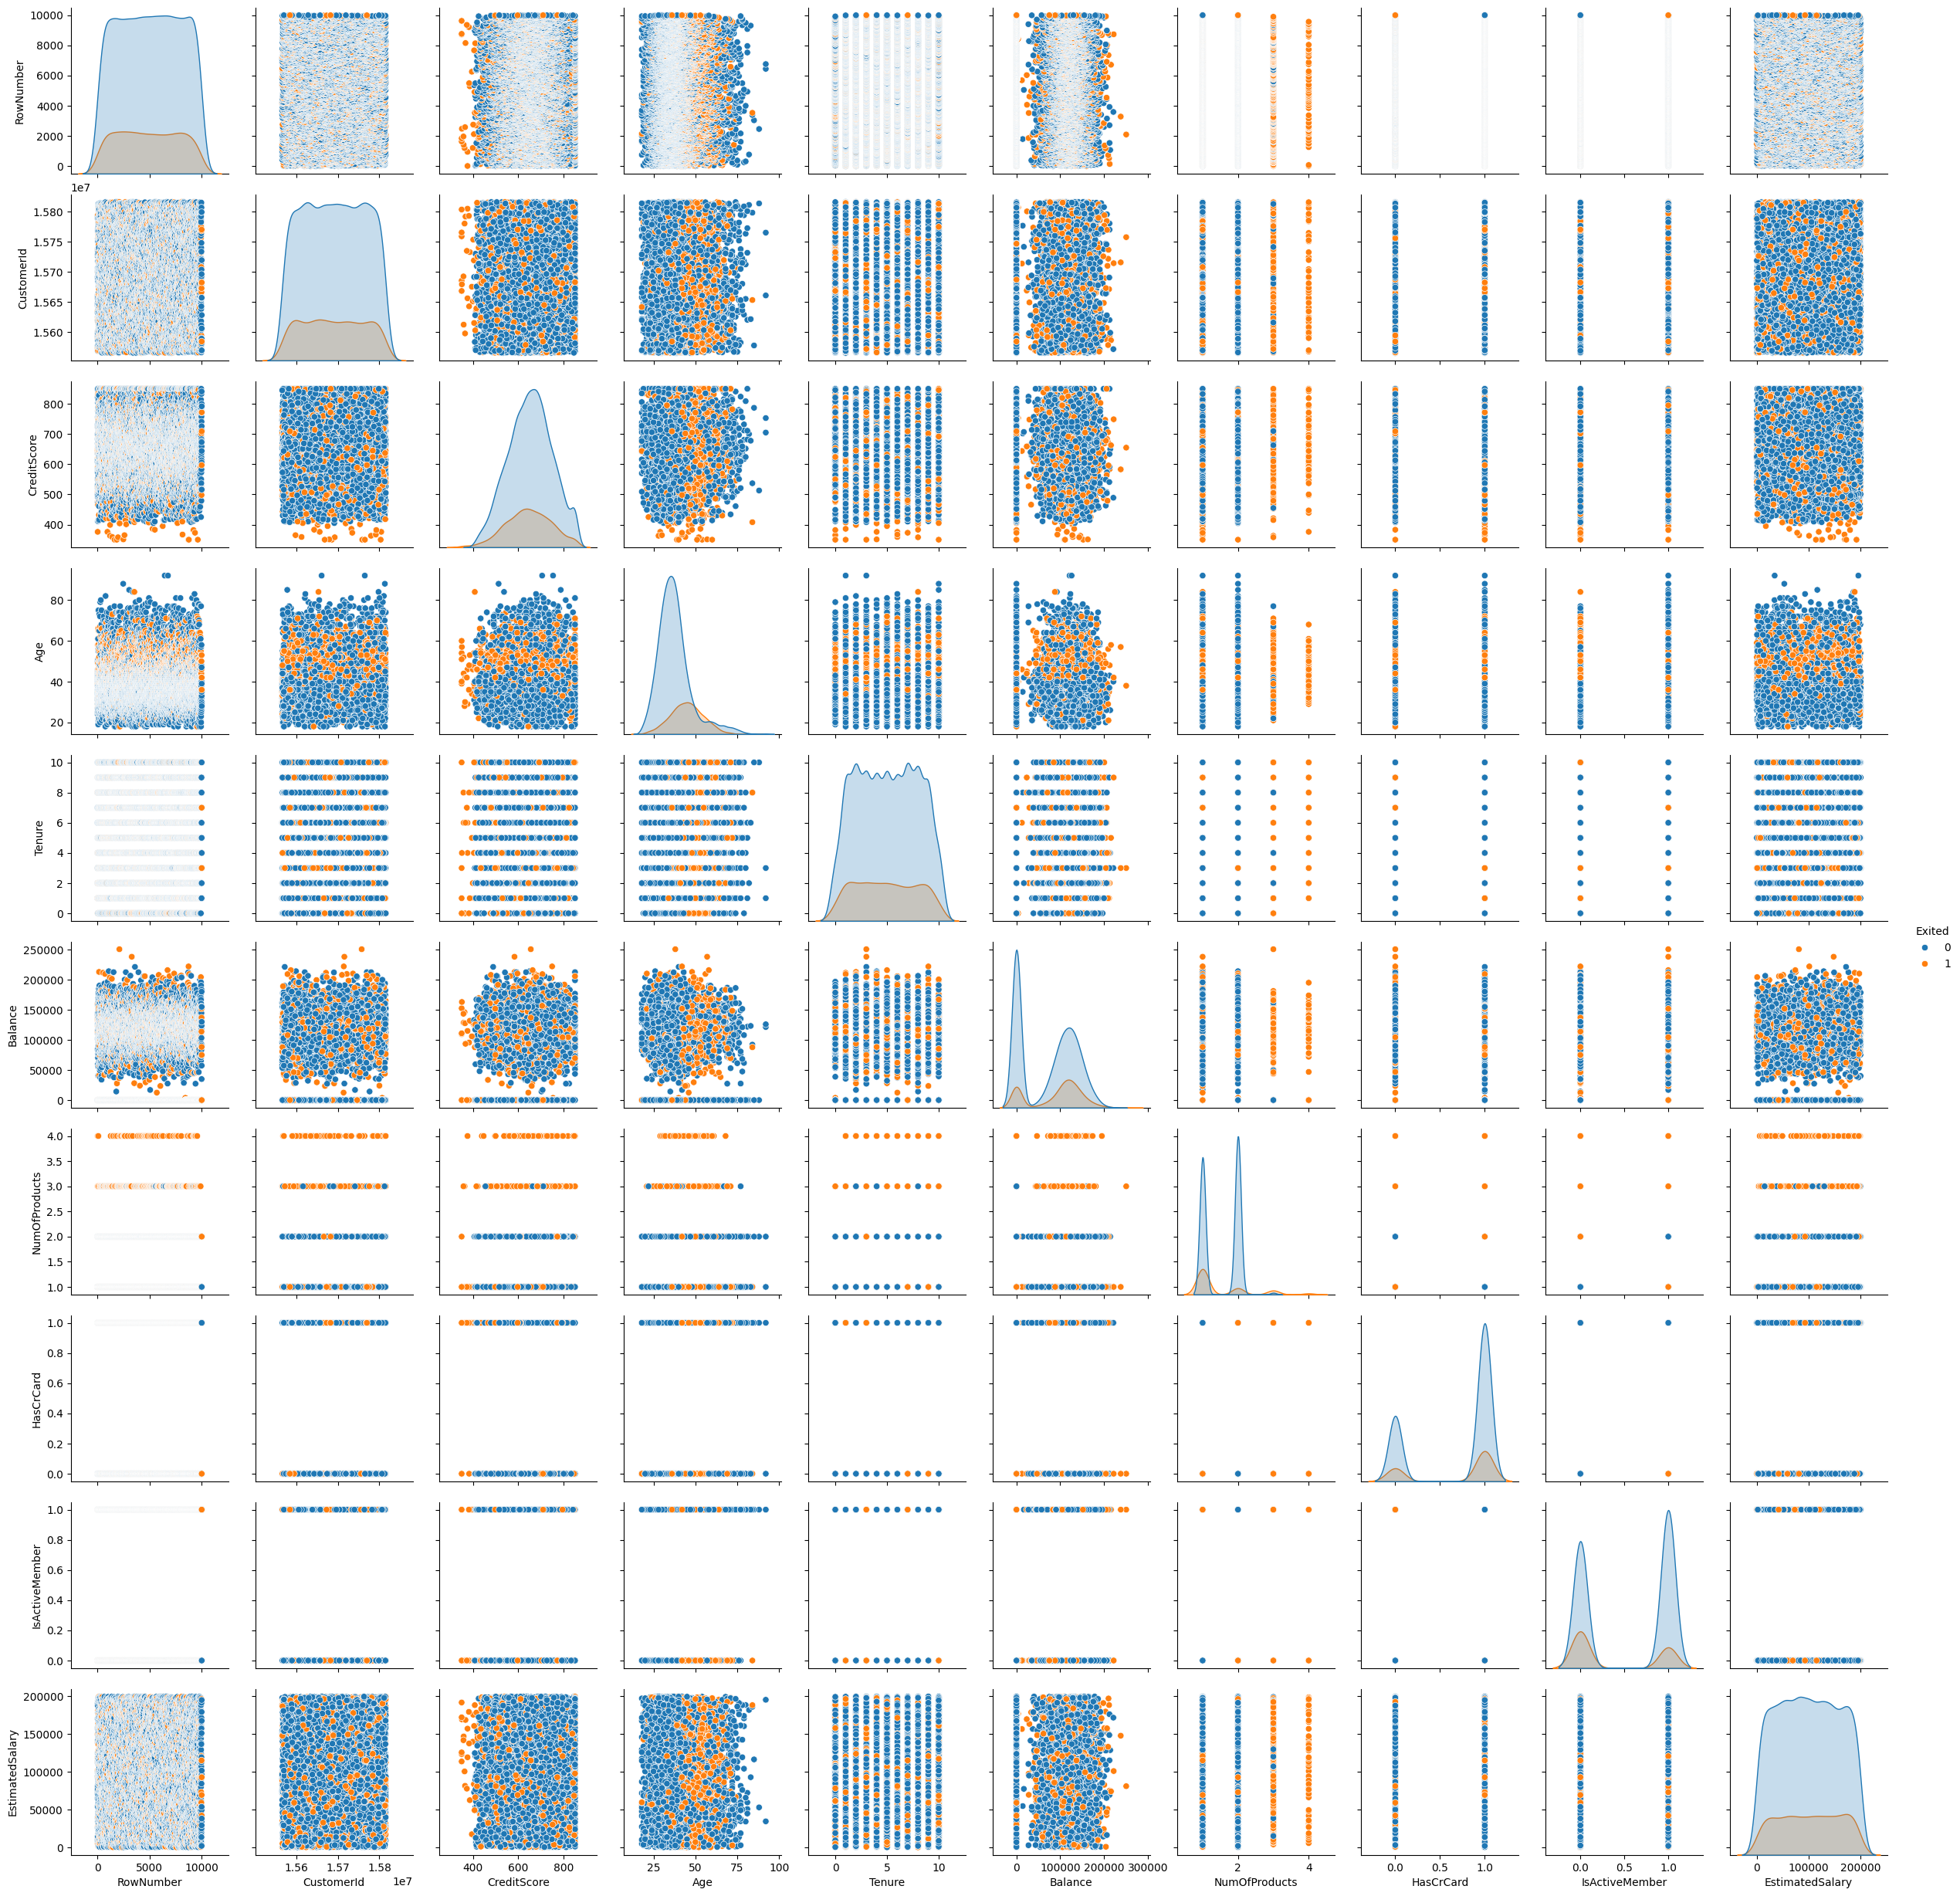

In [ ]:
g = sns.pairplot(df, hue="Exited")

### Encoding categorical data

Label Encoding the "Gender" column

In [ ]:
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [ ]:
df_cp = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
df_cp

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cp['Gender'] = le.fit_transform(df_cp['Gender'])

One Hot Encoding the "Geography" column

In [ ]:
df_cp = pd.get_dummies(df_cp, drop_first=True, dtype=int)
df_cp.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  Geography_Spain  
0               1        101348.88       1                  0                0  
1               1        112542.58       0                  0                1  
2               0        113931.57       1                  0                0  
3               0         93826.63       0                  0                0  
4               1         79084.10       0                  0                1

### Splitting the dataset into the Training set and Test set

In [ ]:
X = df_cp.drop(columns=['Exited'])
y = df_cp['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential() #instansiasi objek ANN yg masih kosong

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [ ]:
import keras
from datetime import datetime

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

ann.fit(X_train, y_train, batch_size = 32, epochs = 100, callbacks=[tensorboard_callback])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7946 - loss: 0.5669
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7985 - loss: 0.4755
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7929 - loss: 0.4519
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8168 - loss: 0.4232
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8246 - loss: 0.4026
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8307 - loss: 0.3921
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8225 - loss: 0.4011
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8267 - loss: 0.4019
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8332 - loss: 0.3846
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8344 - loss: 0.3824
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8298 - loss: 0.3900
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [ ]:
y_pred = ann.predict(X_test)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.26954183],
       [0.3392747 ],
       [0.1800929 ],
       ...,
       [0.1211821 ],
       [0.14482512],
       [0.24261989]], dtype=float32)

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1505   90]
 [ 195  210]]


0.8575

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.70      0.52      0.60       405

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

